In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


In [2]:
%ls "../input/"

tabular-playground-series-feb-2021/


In [3]:
df_train=pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/train.csv',index_col='id')

In [4]:
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [5]:
df_test=pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/test.csv',index_col='id')

In [6]:
cat_features=[]
real_features=[]
for i in range (14):
    if (i<=9):
        cat_features.append(f'cat{i}')
    real_features.append(f'cont{i}')

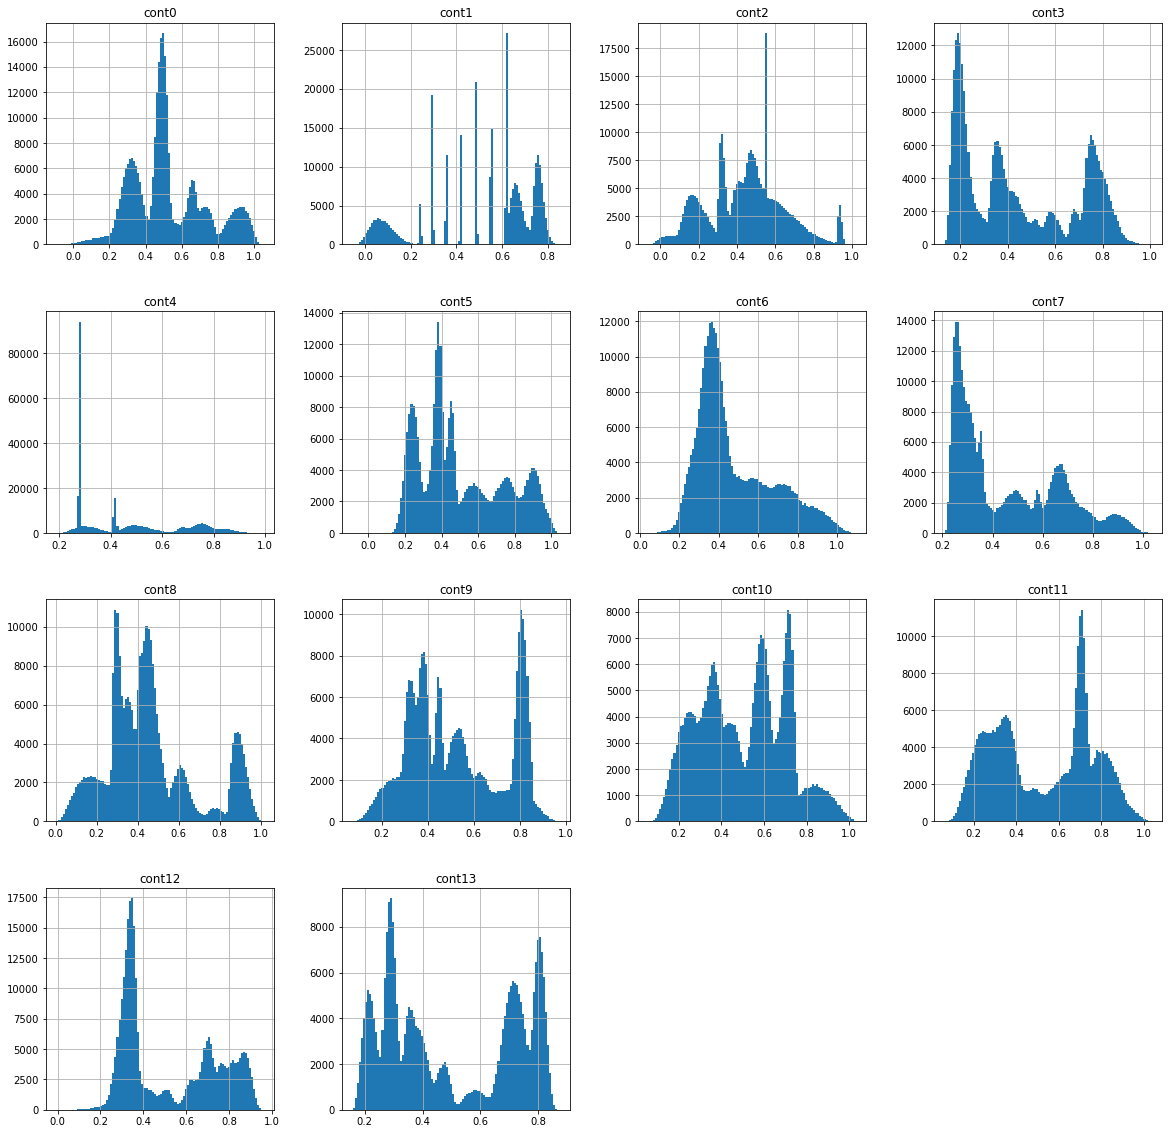

In [7]:
histReal=df_train[real_features].hist(figsize=(20,20),bins=100)

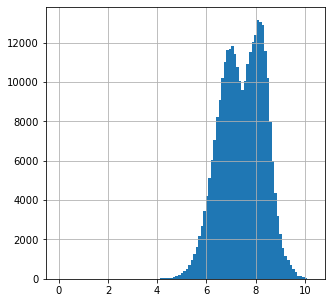

In [8]:
histy=df_train['target'].hist(figsize=(5,5),bins=100)

<AxesSubplot:xlabel='target'>

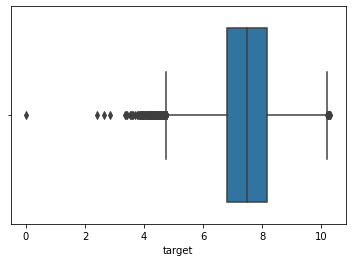

In [9]:
sns.boxplot(x=df_train['target'])

In [10]:
y=df_train['target']
X=df_train.drop('target',axis=1)

In [11]:
#y_val=y.values
#X_val=X.values

In [12]:
#k=0
#for i,item in enumerate(y_val):
#    if ((item>10.2) or (item<4.3)):
#        y_val=np.delete(y_val,i)
#        X_val=np.delete(X_val,i,axis=0)
#        k=k+1

In [13]:
#print(y_val.shape,X_val.shape)
#print (k)

<AxesSubplot:>

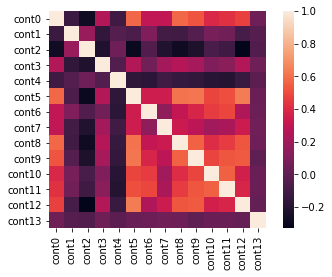

In [14]:
sns.heatmap(df_train[real_features].corr(), square=True)

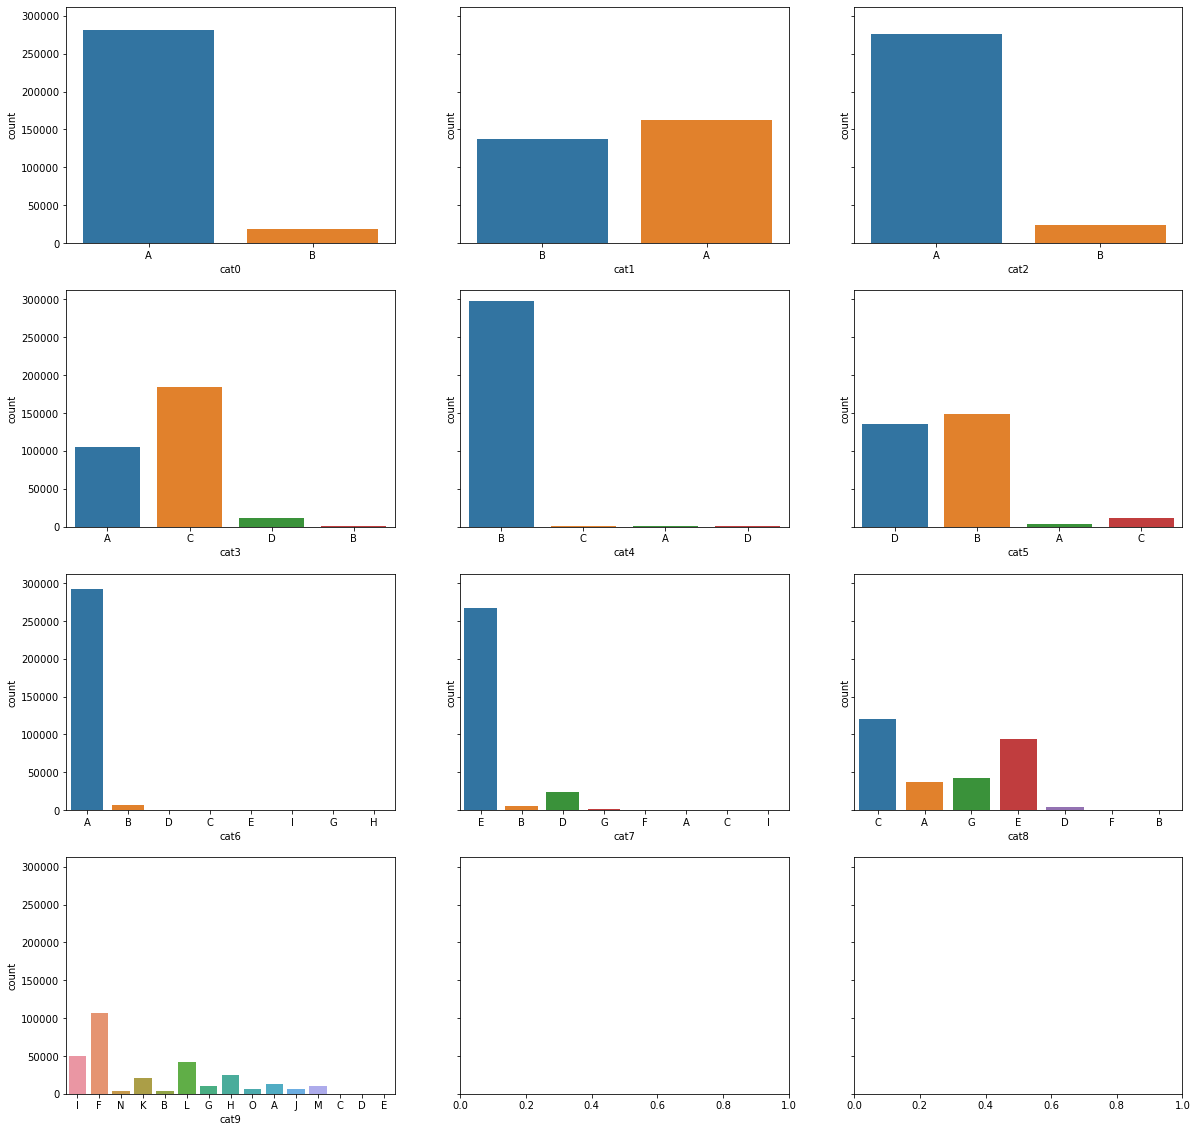

In [15]:
from matplotlib import pyplot as plt
fig,axes=plt.subplots(4, 3, figsize=(20, 20), sharey=True)
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=df_train,ax=axes[int (i / 3),int (i % 3)])

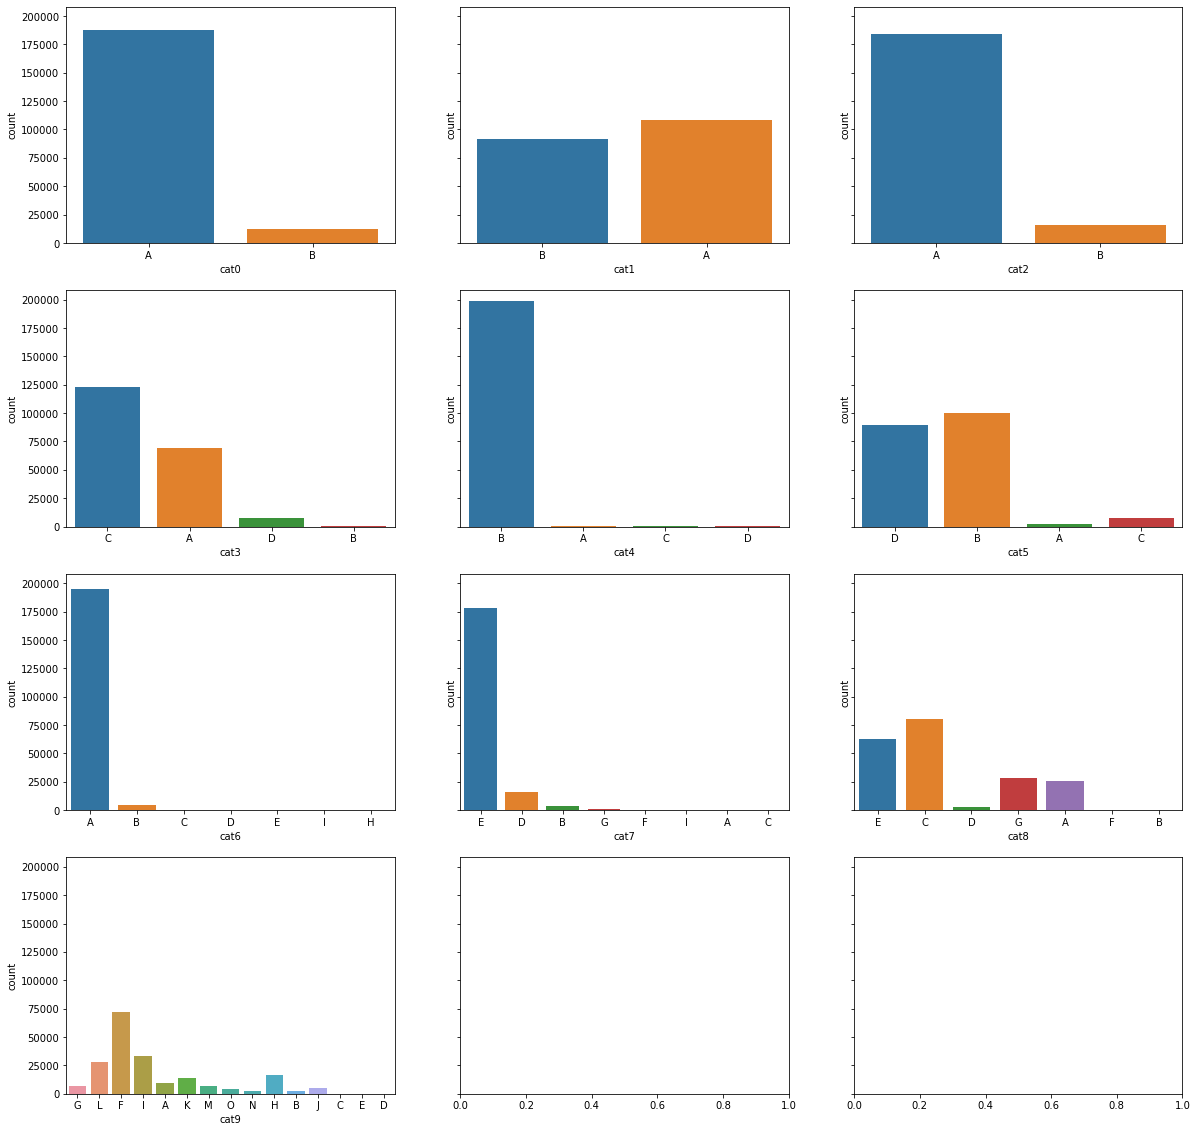

In [16]:
fig,axes=plt.subplots(4, 3, figsize=(20, 20), sharey=True)
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=df_test,ax=axes[int (i / 3),int (i % 3)])

In [17]:
#X=X.drop(['cat0','cat2','cat4','cat6','cat7'],axis=1)
#X_test1=df_test.drop(['cat0','cat2','cat4','cat6','cat7'],axis=1)

In [18]:
#X.head()

In [19]:
#X_test1.head()

In [20]:
X_ohe_cat_train=pd.get_dummies(X)
X_ohe_cat_test1=pd.get_dummies(df_test)

In [21]:
X_ohe_cat_train=X_ohe_cat_train.drop(['cat6_G'],axis=1)

In [22]:
X_ohe_cat_train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
id,,,,,,,,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,...,0,0,0,1,0,0,0,0,0,0
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,...,1,0,0,0,0,0,0,0,0,0
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,...,0,0,0,0,0,0,0,0,1,0
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,...,0,0,0,0,0,1,0,0,0,0
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,...,0,0,0,0,0,0,1,0,0,0
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,...,0,0,0,0,0,0,1,0,0,0
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X_ohe_cat_test1

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
id,,,,,,,,,,,,,,,,,,,,,
0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,...,0,1,0,0,0,0,0,0,0,0
5,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,...,0,0,0,0,0,0,1,0,0,0
15,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,...,1,0,0,0,0,0,0,0,0,0
16,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,...,1,0,0,0,0,0,0,0,0,0
17,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,...,0,0,0,0,0,0,1,0,0,0
499990,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,...,1,0,0,0,0,0,0,0,0,0
499991,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,...,0,0,0,0,0,1,0,0,0,0


In [24]:
X_ohe_cat_train.values[:,14].shape

(300000,)

In [25]:
idx=[]
for i in range (14,69):
    s=0
    for item in (X_ohe_cat_train.values[:,i]):
        s=s+item
        k=s/300000
    if (k<0.01) or (k>0.98):
        idx.append(i)
print (idx)
    

[21, 24, 25, 26, 27, 34, 35, 36, 37, 38, 39, 41, 44, 45, 46, 48, 52, 56, 57, 58]


In [26]:
names=list(X_ohe_cat_train.columns)
names_drop=[]
for item in (idx):
    names_drop.append(names[item])    

In [27]:
X_new_train=X_ohe_cat_train.drop(names_drop,axis=1)
X_new_test=X_ohe_cat_test1.drop(names_drop,axis=1)

In [28]:
X_new_train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
id,,,,,,,,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,...,0,0,0,1,0,0,0,0,0,0
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,...,1,0,0,0,0,0,0,0,0,0
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,...,0,0,0,0,0,0,0,0,1,0
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,...,0,0,0,0,0,1,0,0,0,0
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,...,0,0,0,0,0,0,1,0,0,0
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,...,0,0,0,0,0,0,1,0,0,0
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,...,0,0,0,0,0,0,0,1,0,0


In [29]:
X_new_test

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
id,,,,,,,,,,,,,,,,,,,,,
0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,...,0,1,0,0,0,0,0,0,0,0
5,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,...,0,0,0,0,0,0,1,0,0,0
15,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,...,1,0,0,0,0,0,0,0,0,0
16,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,...,1,0,0,0,0,0,0,0,0,0
17,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,...,0,0,0,0,0,0,1,0,0,0
499990,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,...,1,0,0,0,0,0,0,0,0,0
499991,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,...,0,0,0,0,0,1,0,0,0,0


In [30]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
import optuna
from functools import partial
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [31]:
def objective (trial,X_ohe,y):
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_int('n_estimators',1000,5000),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    
    model=xgb.XGBRegressor(**param)
    X_train,X_test,y_train,y_test=train_test_split(X_ohe, y, test_size=0.2, random_state=42)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds,squared=False)
    return rmse
    

optimize_func=partial(objective,X_ohe=X_new_train,y=y)
study = optuna.create_study(direction='minimize')
study.optimize(optimize_func, n_trials=50)


[I 2021-02-13 16:00:17,570] A new study created in memory with name: no-name-0b5c0fdc-9d54-4a39-86dd-53519313dcc4
[I 2021-02-13 16:00:32,461] Trial 0 finished with value: 0.8428502788722897 and parameters: {'lambda': 4.883802961038013, 'alpha': 4.22867189276159, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.016, 'n_estimators': 3488, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 80}. Best is trial 0 with value: 0.8428502788722897.
[I 2021-02-13 16:00:45,757] Trial 1 finished with value: 0.8434041524705796 and parameters: {'lambda': 1.179847944275851, 'alpha': 0.8098478579855322, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'n_estimators': 2654, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 203}. Best is trial 0 with value: 0.8428502788722897.
[I 2021-02-13 16:01:19,962] Trial 2 finished with value: 0.8448478223194671 and parameters: {'lambda': 0.1834824793455167, 'alpha': 0.0805030897313342, 'colsample_bytree': 0.8, 'subsample': 

In [32]:
study.best_params

{'lambda': 0.0028094800854545758,
 'alpha': 2.6469603056239093,
 'colsample_bytree': 0.3,
 'subsample': 0.6,
 'learning_rate': 0.014,
 'n_estimators': 4667,
 'max_depth': 7,
 'random_state': 48,
 'min_child_weight': 272}

In [33]:
best_params={
 'tree_method':'gpu_hist',
 'lambda': 1.3503566791440371,
 'alpha': 0.19551844786429923,
 'colsample_bytree': 0.3,
 'subsample': 0.7,
 'learning_rate': 0.008,
 'n_estimators': 4375,
 'max_depth': 7,
 'random_state': 48,
 'min_child_weight': 250}

In [34]:
rmse_scores=0
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42,shuffle=True)
i=1
for train_index, test_index in kf.split(X_new_train):
    X_train, X_test = X_new_train.iloc[train_index], X_new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model=xgb.XGBRegressor(**best_params)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=200,verbose=False)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds,squared=False)
    rmse_scores=rmse_scores+rmse
    print (f'KFold{i}','RMSE=',rmse)
    i=i+1
print (rmse_scores/10)

KFold1 RMSE= 0.8450574911500779
KFold2 RMSE= 0.8385044225765269
KFold3 RMSE= 0.8448051853073307
KFold4 RMSE= 0.8430241119622953
KFold5 RMSE= 0.8412574707027585
KFold6 RMSE= 0.8437747629400986
KFold7 RMSE= 0.8417531678355761
KFold8 RMSE= 0.8413618751550357
KFold9 RMSE= 0.8425065559354241
KFold10 RMSE= 0.8389754349752321
0.8421020478540356


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_new_train, y, test_size=0.001, random_state=42)
model=xgb.XGBRegressor(**best_params)
model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=200,verbose=False)

XGBRegressor(alpha=0.19551844786429923, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', lambda=1.3503566791440371,
             learning_rate=0.008, max_delta_step=0, max_depth=7,
             min_child_weight=250, missing=nan, monotone_constraints='()',
             n_estimators=4375, n_jobs=2, num_parallel_tree=1, random_state=48,
             reg_alpha=0.195518449, reg_lambda=1.3503567, scale_pos_weight=1,
             subsample=0.7, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [36]:
y_pred1=model.predict(X_new_test)

In [37]:
y_pred1

array([7.604629 , 7.7879376, 7.605709 , ..., 7.5484123, 7.4517283,
       7.36137  ], dtype=float32)

In [38]:
submission = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv',index_col='id')
submission['target']=y_pred1

In [39]:
submission

,target
id,
0,7.604629
5,7.787938
15,7.605709
16,7.468048
17,7.251172
...,...
499987,7.535003
499990,7.239317
499991,7.548412


In [40]:
submission.to_csv('easy_xgb.csv')